# Chapter 10 - Special Bases

## Computational Problem 10.2.1
Find closest vector whose representation in a given basis is sparse

### Lemma 10.2.2
Let Q be a column-orthogonal matrix. Multiplication of vectors by Q preserves inner-products: For any vectors u and v,

    ⟨Qu, Qv⟩ = ⟨u, v⟩

For any column-orthogonal matrix Q and vector u, ||Qu|| = ||u||.

Find a vector in $\hat{b}$ is equivalent of finding representation

    Qx = b
    Qx˜=b˜
    ∥Qx, Qx˜∥=∥b, b˜∥

## Wavelets
Define the basis using the largest n-dimension Vₙ; basis for downsampled pixels Vₖ could be constructed by pairing V₍ₖ₋₁₎

The wavelet space is defined as:
$V_{2k} = V_{k} \oplus W_{k}$ 

The original space could be decomposed as The Haar basis:
$V_{2^n} = V_{1} \oplus W_{1} \oplus W_{2} \oplus \dots W_{2^{n-1}}$ 

## Fourier Matrix
First look at polynomial function:

### Polynomial Interpolation

#### Theorem 10.4.1: For any nonzero polynomial f(x) of degree d, there are at most d values of x whose images under f is zero.

#### Theorem 10.4.2: conditions for unique solution
In the case that k = d + 1 and __the numbers r0, . . . , rk−1 are all distinct__, the function is invertible.
$$
f(a) = 
\begin{pmatrix}
r_0^0 & r_0^1 & \dots & r_0^d \\
r_1^0 & r_1^1 & \dots & r_1^d \\
\vdots & \vdots \\
r_{k-1}^0 & r_{k-1}^1 & \dots & r_{k-1}^d
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_d
\end{pmatrix}
$$

Polynomial interpolation: the process of obtaining the coefficients from the values representations.

## Fourier Matrix
Define $F_k(t) = \frac{1}{\sqrt(n)} (\omega^k)^t$, its period is $\frac{n}{k}$.

Build a matrix with [F_0, F_1, F_2 ... ], each column is "clock" at a different interval.

Choose, $w = e^{\frac{2 \pi i}{n}}$ for F, we have Fourier matrix. 

## Fast Fourier Transform
Conditions:
- n is power of two
- $w^n = 1$

Key insights:
- Saving computation by symmetry
- 

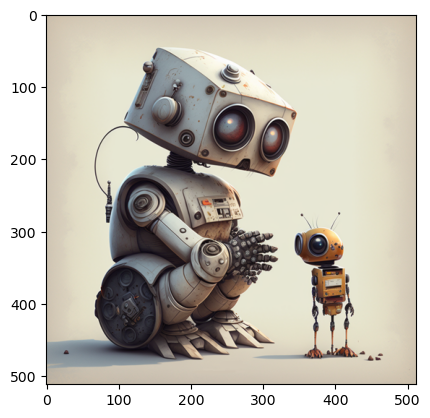

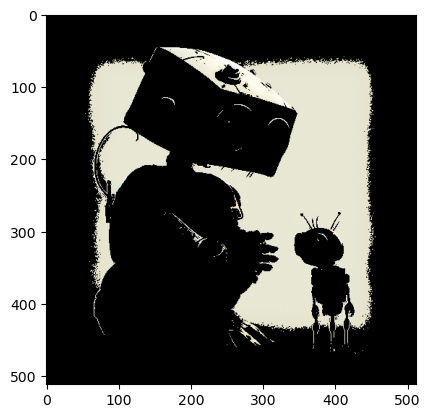

In [2]:
# Demo of naive k-sparse transformation
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('bot.png')
new_size = (img.size[0] // 2, img.size[1] // 2)
img = img.resize(new_size)
img_arr = np.array(img)

def rgba_weight(rgba):
    value = 0.0  # force cast to float
    return (value + rgba[0] + rgba[1] + rgba[2]) * (rgba[3]/255.0)

def naive_k_sparse(img_arr, k):
    """Convert the img_arr to k-sparse matrix in place"""
    flat_img = img_arr.reshape(-1, 4)

    # compute the importances of each element in the matrix
    importances = np.apply_along_axis(rgba_weight, axis=1, arr=flat_img)

    # use argpartition to get the indices of the k largest importances
    indices = np.argsort(importances)
    mask = importances < importances[indices[-k]]
    flat_img[mask] = [0, 0, 0, 255]

    new_img = flat_img.reshape(*new_size, -1)
    return new_img

plt.imshow(img_arr)
plt.show()

k = 256 * 256 - 1
# k = 512 * 512 - 1
new_img = naive_k_sparse(img_arr, k)

# As expected it doesn't work well, a lot values are dropped to zero
plt.imshow(new_img)
plt.show()

In [4]:
# Next step, change basis in which the image would be k-sparse
# Enters wavelet
# 10.9.1
def forward_no_normalization(v):
   assert len(v) & (len(v) - 1) == 0  # v must be a power of 2
   D = {}
   while len(v) > 1:
      k = len(v)
      # ... downsampled 1-d image of size k//2 from v ...
      vnew = [(v[i] + v[i+1])/2 for i in range(0, k, 2)]
      # ... compute unnormalized coefficients of basis for W(k/2) ...
      w = [(v[i] - v[i+1]) for i in range(0, k, 2)]
      D.update({(k//2, i): w[i] for i in range(0, k//2)})
      v = vnew

   # v is a 1-element list
   D[(0, 0)] = v[0]  # store the last coefficient
   return D

examples= [
    [1, 2, 3, 4],
    [4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0],
    [1, 1, 2, 2],
    [0, 1, 1, 1, -1, 1, 0, 1, 100, 101, 102, 100, 101, 100, 90, 100]
]
# forward_no_normalization(v)
for v in examples:
    display(forward_no_normalization(v))

{(2, 0): -1, (2, 1): -1, (1, 0): -2.0, (0, 0): 2.5}

{(8, 0): -1,
 (8, 1): -4,
 (8, 2): -1,
 (8, 3): -1,
 (8, 4): 2,
 (8, 5): -2,
 (8, 6): 0,
 (8, 7): 0,
 (4, 0): -0.5,
 (4, 1): 2.0,
 (4, 2): 4.0,
 (4, 3): 0.0,
 (2, 0): 1.25,
 (2, 1): 6.0,
 (1, 0): 1.125,
 (0, 0): 3.5625}

{(2, 0): 0, (2, 1): 0, (1, 0): -1.0, (0, 0): 1.5}

{(8, 0): -1,
 (8, 1): 0,
 (8, 2): -2,
 (8, 3): -1,
 (8, 4): -1,
 (8, 5): 2,
 (8, 6): 1,
 (8, 7): -10,
 (4, 0): -0.5,
 (4, 1): -0.5,
 (4, 2): -0.5,
 (4, 3): 5.5,
 (2, 0): 0.5,
 (2, 1): 3.0,
 (1, 0): -98.75,
 (0, 0): 49.875}

In [5]:
# Task 10.9.2
import math
def normalize_coefficients(n, D):
    return {d: D[d] * math.sqrt(n / (4 * d[0])) if d[0] != 0 
            else D[d] * math.sqrt(n)
            for d in D}

for v in examples:
    display(normalize_coefficients(len(v), 
        forward_no_normalization(v)))

{(2, 0): -0.7071067811865476,
 (2, 1): -0.7071067811865476,
 (1, 0): -2.0,
 (0, 0): 5.0}

{(8, 0): -0.7071067811865476,
 (8, 1): -2.8284271247461903,
 (8, 2): -0.7071067811865476,
 (8, 3): -0.7071067811865476,
 (8, 4): 1.4142135623730951,
 (8, 5): -1.4142135623730951,
 (8, 6): 0.0,
 (8, 7): 0.0,
 (4, 0): -0.5,
 (4, 1): 2.0,
 (4, 2): 4.0,
 (4, 3): 0.0,
 (2, 0): 1.7677669529663689,
 (2, 1): 8.485281374238571,
 (1, 0): 2.25,
 (0, 0): 14.25}

{(2, 0): 0.0, (2, 1): 0.0, (1, 0): -1.0, (0, 0): 3.0}

{(8, 0): -0.7071067811865476,
 (8, 1): 0.0,
 (8, 2): -1.4142135623730951,
 (8, 3): -0.7071067811865476,
 (8, 4): -0.7071067811865476,
 (8, 5): 1.4142135623730951,
 (8, 6): 0.7071067811865476,
 (8, 7): -7.0710678118654755,
 (4, 0): -0.5,
 (4, 1): -0.5,
 (4, 2): -0.5,
 (4, 3): 5.5,
 (2, 0): 0.7071067811865476,
 (2, 1): 4.242640687119286,
 (1, 0): -197.5,
 (0, 0): 199.5}

In [6]:
def forward(v):
    return normalize_coefficients(
        len(v), forward_no_normalization(v))

for v in examples:
    print(forward(v))

{(2, 0): -0.7071067811865476, (2, 1): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0}
{(8, 0): -0.7071067811865476, (8, 1): -2.8284271247461903, (8, 2): -0.7071067811865476, (8, 3): -0.7071067811865476, (8, 4): 1.4142135623730951, (8, 5): -1.4142135623730951, (8, 6): 0.0, (8, 7): 0.0, (4, 0): -0.5, (4, 1): 2.0, (4, 2): 4.0, (4, 3): 0.0, (2, 0): 1.7677669529663689, (2, 1): 8.485281374238571, (1, 0): 2.25, (0, 0): 14.25}
{(2, 0): 0.0, (2, 1): 0.0, (1, 0): -1.0, (0, 0): 3.0}
{(8, 0): -0.7071067811865476, (8, 1): 0.0, (8, 2): -1.4142135623730951, (8, 3): -0.7071067811865476, (8, 4): -0.7071067811865476, (8, 5): 1.4142135623730951, (8, 6): 0.7071067811865476, (8, 7): -7.0710678118654755, (4, 0): -0.5, (4, 1): -0.5, (4, 2): -0.5, (4, 3): 5.5, (2, 0): 0.7071067811865476, (2, 1): 4.242640687119286, (1, 0): -197.5, (0, 0): 199.5}


In [7]:
def suppress(D, threshold):
    return {d: 0 if abs(D[d]) < threshold else D[d] for d in D}

for v in examples:
    print(suppress(forward(v), 1))

{(2, 0): 0, (2, 1): 0, (1, 0): -2.0, (0, 0): 5.0}
{(8, 0): 0, (8, 1): -2.8284271247461903, (8, 2): 0, (8, 3): 0, (8, 4): 1.4142135623730951, (8, 5): -1.4142135623730951, (8, 6): 0, (8, 7): 0, (4, 0): 0, (4, 1): 2.0, (4, 2): 4.0, (4, 3): 0, (2, 0): 1.7677669529663689, (2, 1): 8.485281374238571, (1, 0): 2.25, (0, 0): 14.25}
{(2, 0): 0, (2, 1): 0, (1, 0): -1.0, (0, 0): 3.0}
{(8, 0): 0, (8, 1): 0, (8, 2): -1.4142135623730951, (8, 3): 0, (8, 4): 0, (8, 5): 1.4142135623730951, (8, 6): 0, (8, 7): -7.0710678118654755, (4, 0): 0, (4, 1): 0, (4, 2): 0, (4, 3): 5.5, (2, 0): 0, (2, 1): 4.242640687119286, (1, 0): -197.5, (0, 0): 199.5}


In [8]:
def sparsity(D):
    return len([D[d] for d in D if D[d] != 0]) / len(D)

for v in examples:
    print(
        sparsity(forward(v)),
        sparsity(suppress(forward(v), 1)))

1.0 0.5
0.8125 0.5625
0.5 0.5
0.9375 0.4375


In [10]:
def unnormalize_coefficients(n, D):
    return {d: D[d] / math.sqrt(n / (4 * d[0])) if d[0] != 0 
            else D[d] / math.sqrt(n)
            for d in D}

In [12]:
import itertools
def interleave(a, b):
    return list(itertools.chain.from_iterable(
        itertools.zip_longest(a, b, fillvalue=None)))

def backward_no_normalization(D):
    n = len(D)
    v = [D[(0, 0)]]
    while len(v) < n:
        k = 2 * len(v)
        v_k = [vi*2 for vi in v]
        w_k = [D[d] for d in D if d[0] == k//2]
        assert len(v_k) == len(w_k)
        # NOTE: v_k = (x + y), w_k = (x - y)
        v = interleave([(v_k[i] + w_k[i])/2 for i in range(len(v_k))],
                        [(v_k[i] - w_k[i])/2 for i in range(len(v_k))])

    return v

for v in examples[:]:
    assert (backward_no_normalization(forward_no_normalization(v))) == v

In [13]:
def backward(D):
    return backward_no_normalization(
        unnormalize_coefficients(len(D), D)
    )

for v in examples[:]:
    assert (backward(forward(v))) == v

In [14]:
# Now in 2d image space
def dictlist_helper(dlist, k):
    return [d[k] for d in dlist]

def forward2d(listlist):
    D_list = [forward(l) for l in listlist]
    assert all([D_list[i].keys() == D_list[0].keys() 
                for i in range(len(D_list))])
    cols = {k: dictlist_helper(D_list, k) for k in D_list[0]}
    forwarded_cols = {k: forward(cols[k]) for k in cols}
    return forwarded_cols

[
    forward([1, 2, 3, 4]),
    forward([2, 3, 4, 3]),
    forward2d([[1, 2, 3, 4]]),
    forward2d([[1, 2, 3, 4], [2, 3, 4, 3]]),
]

[{(2, 0): -0.7071067811865476,
  (2, 1): -0.7071067811865476,
  (1, 0): -2.0,
  (0, 0): 5.0},
 {(2, 0): -0.7071067811865476,
  (2, 1): 0.7071067811865476,
  (1, 0): -1.0,
  (0, 0): 6.0},
 {(2, 0): {(0, 0): -0.7071067811865476},
  (2, 1): {(0, 0): -0.7071067811865476},
  (1, 0): {(0, 0): -2.0},
  (0, 0): {(0, 0): 5.0}},
 {(2, 0): {(1, 0): 0.0, (0, 0): -1.0000000000000002},
  (2, 1): {(1, 0): -1.0000000000000002, (0, 0): 0.0},
  (1, 0): {(1, 0): -0.7071067811865476, (0, 0): -2.121320343559643},
  (0, 0): {(1, 0): -0.7071067811865476, (0, 0): 7.778174593052023}}]

In [15]:
def suppress2d(D_dict, threshold):
    return {ck: {rk: 0 if abs(D_dict[ck][rk]) < threshold else D_dict[ck][rk]
                 for rk in D_dict[ck]}
            for ck in D_dict}

def allpixels(D_dict):
    for ck in D_dict:
            for rk in D_dict[ck]:
                yield D_dict[ck][rk]

def allpixels_map(D_dict, fn):
    for ck in D_dict:
            for rk in D_dict[ck]:
                D_dict[ck][rk] = fn(D_dict[ck][rk])

def sparsity2d(D_dict):
    total = 0
    count = 0
    for pixel in allpixels(D_dict):
        if pixel != 0:
            count += 1
        total += 1

    return count / total

In [16]:
def listdict2dict(L_dict, i):
    return {k: L_dict[k][i] for k in L_dict}

def listdict2dictlist(listdict):
    k_0 = list(listdict.keys())[0]
    len_col = len(listdict[k_0])
    return [{k: listdict[k][i] for k in listdict} for i in range(len_col)]

d = {(0, 0): [1, 2, 3, 4], (1, 0): [2, 3, 4, 3]}
listdict2dictlist(d)

[{(0, 0): 1, (1, 0): 2},
 {(0, 0): 2, (1, 0): 3},
 {(0, 0): 3, (1, 0): 4},
 {(0, 0): 4, (1, 0): 3}]

In [17]:
def backward2d(D):
    backward_cols = {d: backward(D[d]) for d in D}
    # print("D:", D)
    # print("cols: ", backward_cols)
    # print("list_cols: ", listdict2dictlist(backward_cols))
    return [backward(r) for r in 
            listdict2dictlist(backward_cols)]

examples = [
    [[1, 2, 3, 4]],
    [[1, 2, 3, 4], [2, 3, 4, 3]],
    
]
for m in examples:
    display(backward2d(forward2d(m)))
    

[[1.0, 2.0, 3.0, 4.0]]

[[0.9999999999999999, 2.0, 3.0, 4.0], [2.0, 3.0, 4.0, 3.0]]

In [18]:
def image_round(image):
    for i, row in enumerate(image):
        image[i] = [min(abs(round(v)), 255) for v in row]
    return image

In [21]:
from book.image import file2image, color2gray, image2display

img = file2image('bot.png')
gray = color2gray(img)

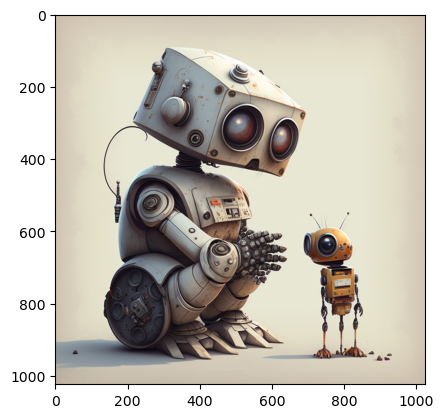

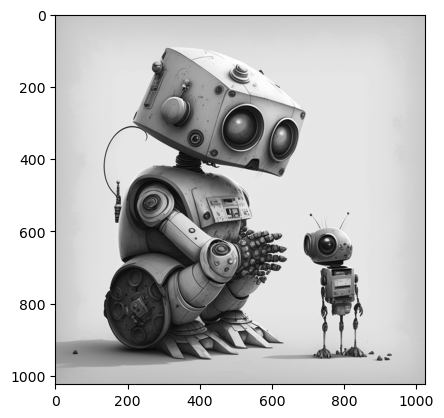

In [23]:
plt.imshow(img, cmap='gray')
plt.show()

transformed_img = image_round(backward2d(forward2d(gray)))

plt.imshow(transformed_img, cmap='gray')
plt.show()

threshold: 20.0, sparsity:  0.06163215637207031
threshold: 265.0, sparsity:  0.0026254653930664062
threshold: 510.0, sparsity:  0.0009632110595703125
threshold: 755.0, sparsity:  0.0005245208740234375
threshold: 1000.0, sparsity:  0.00033664703369140625


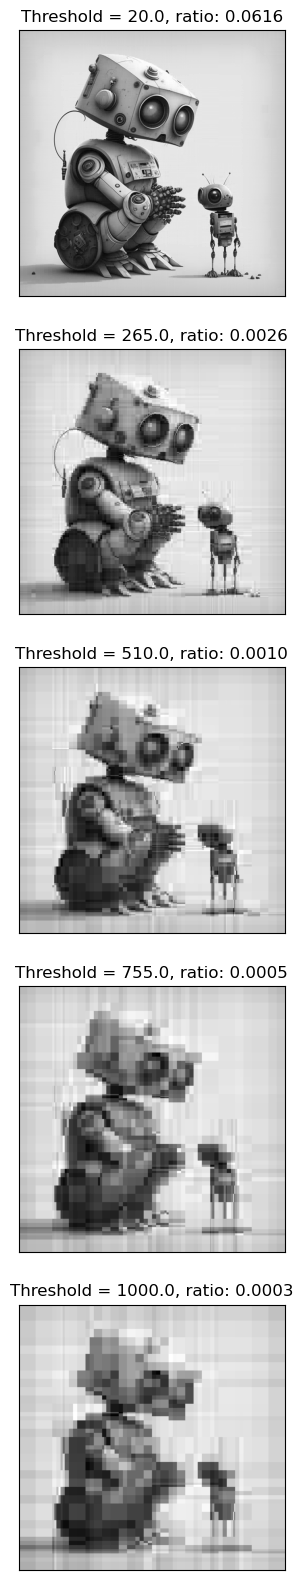

In [24]:
fig, axs = plt.subplots(nrows=5, figsize=(8, 5*4))

# display(sorted(allpixels(compressed_img), reverse=True)[50:100])

for i, threshold in enumerate(np.linspace(20, 1000, 5)):
    compressed_img = suppress2d(forward2d(gray), threshold)
    ratio = sparsity2d(compressed_img)
    print(f"threshold: {threshold}, sparsity: ", ratio)
    axs[i].imshow(image_round(backward2d(compressed_img)), cmap='gray')
    axs[i].set_title(f"Threshold = {threshold}, ratio: {ratio:.4f}")

# Hide the x and y axis labels for all subplots
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

plt.show()

noise: 0.1 finished
noise: 0.325 finished
noise: 0.55 finished
noise: 0.775 finished
noise: 1.0 finished


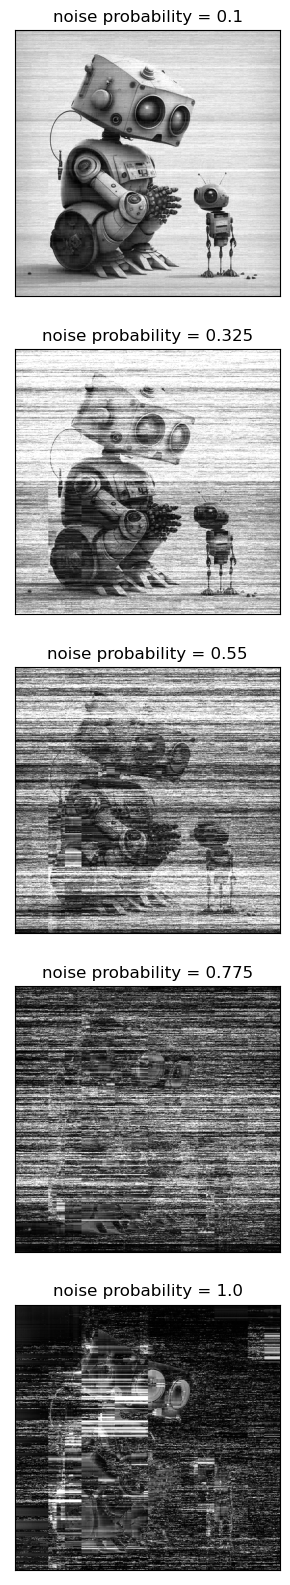

In [25]:
# Experiment: what if we add noise to the backward transform?
# How would it affect the image?

fig, axs = plt.subplots(nrows=5, figsize=(8, 5*4))
import random

noise_level = 2

def with_noise(pixel, noise):
    if random.uniform(0, 1) < noise:
        return pixel + random.uniform(-1, 1) * noise * max(pixel, 1.0)
    else:
        return pixel

def backward_no_normalization_noisy(D, noise):
    n = len(D)
    v = [D[(0, 0)]]
    while len(v) < n:
        k = 2 * len(v)
        v_k = [vi*2 for vi in v]
        w_k = [D[d] for d in D if d[0] == k//2]
        assert len(v_k) == len(w_k)
        # NOTE: v_k = (x + y), w_k = (x - y)
        v = interleave([with_noise(v_k[i] + w_k[i], noise)/2 for i in range(len(v_k))],
                       [with_noise(v_k[i] - w_k[i], noise)/2 for i in range(len(v_k))])

    return v

def backward_noisy(D, noise):
    return backward_no_normalization_noisy(
        unnormalize_coefficients(len(D), D), noise
    )

def backward2d_noisy(D, noise):
    """Apply noise at every recursive step"""
    backward_cols = {d: backward_noisy(D[d], noise) for d in D}
    return [backward_noisy(r, noise) for r in 
            listdict2dictlist(backward_cols)]

def backward2d_noisy_0(D, noise):
    """Only add noise for the last layer"""
    def add_noise(pixel):
        return pixel + pixel * random.uniform(-1, 1) * noise

    allpixels_map(D, add_noise)
    return backward2d(D)

threshold = 50
for i, noise in enumerate(np.linspace(0.1, 1, 5)):
    compressed_img = suppress2d(forward2d(gray), threshold)
    axs[i].imshow(image_round(backward2d_noisy(compressed_img, noise)), cmap='gray')
    axs[i].set_title(f"noise probability = {noise}")
    print(f"noise: {noise} finished")

# Hide the x and y axis labels for all subplots
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

plt.show()

In [ ]:
# Problem 10.11.1
from book.mat import *
from book.matutil import *
from ch5_problem import accept_list
from math import sqrt

@accept_list
def orthogonal_vec2rep(Q, b):
    # needs Q^-1*x = b => QQ^-1*x = Qb => x = Qb
    return Q * b


Q = listlist2mat([
    [1/sqrt(2), 1/sqrt(2), 0],
    [1/sqrt(3), -1/sqrt(3), 1/sqrt(3)],
    [-1/sqrt(6), 1/sqrt(6), 2/sqrt(6)],
])
b = [10, 20, 30]
orthogonal_vec2rep(Q, b)

Vec({0, 1, 2},{0: 21.213203435596423, 1: 11.547005383792516, 2: 28.577380332470415})

In [ ]:
@accept_list
def orthogonal_change_of_basis(A, B, a):
    # v = A^T*a = B*b
    # b = B^-1*B*b =B^-1*v = B^-1*A^T*a = A*B*a
    return (A*B).T*a

a = [sqrt(2), 1/sqrt(3), 2/sqrt(6)]
orthogonal_change_of_basis(Q, Q, a)

Vec({0, 1, 2},{0: 0.87620875991231, 1: 0.5380048024607847, 2: 1.3938468501173522})

In [ ]:
from book.vecutil import *

@accept_list
def orthonormal_projection_orthogonal(W, b):
    # Extract the portion where b projected to row space of W
    # W*b = [b1*r1, b2*r2 + ...]
    # Diagonal W*W.T is |r1|^2, |r2|^2, ...
    return b - W.T * list2vec([(W*b)[i] / (W*W.T)[i, i] for i in W.D[0]])

W = listlist2mat([
    [1/sqrt(2), 1/sqrt(2), 0],
    [1/sqrt(3), -1/sqrt(3), 1/sqrt(3)],
])
b = [10, 20, 30]

orthonormal_projection_orthogonal(W, b)

Vec({0, 1, 2},{0: -11.666666666666668, 1: 11.666666666666668, 2: 23.333333333333332})